In [16]:
using Plots
theme(:dracula, lw=2)

In [19]:
x = [-pi:0.1:pi;]
y1 = sin.(x)
y2 = cos.(x)


63-element Vector{Float64}:
 -1.0
 -0.9950041652780257
 -0.9800665778412415
 -0.9553364891256061
 -0.9210609940028851
 -0.8775825618903726
 -0.8253356149096782
 -0.7648421872844883
 -0.6967067093471655
 -0.6216099682706644
  ⋮
 -0.6346928759426347
 -0.7086697742912601
 -0.7755658785102502
 -0.8347127848391599
 -0.8855195169413194
 -0.9274784307440359
 -0.9601702866503661
 -0.9832684384425847
 -0.9965420970232175

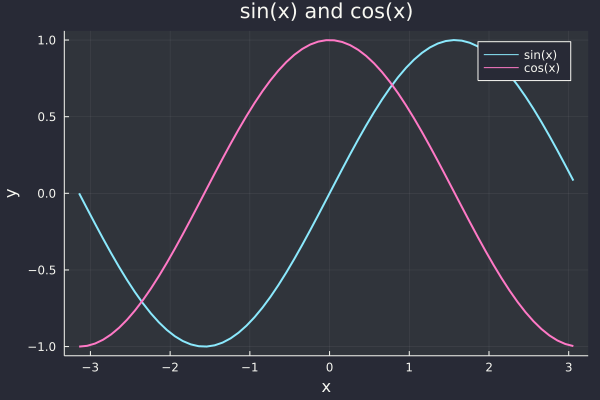

In [27]:
plot(x, y1, label="sin(x)")
plot!(x, y2, title = "sin(x) and cos(x)", label = "cos(x)")
xlabel!("x")
ylabel!("y")

In [17]:
using Distributions
rand(Uniform(1, 150), 3)

3-element Vector{Float64}:
 29.238402494164344
 23.042069825272147
 70.58346978196792

In [36]:
a = sample(1:4)

4

In [39]:
a = [1,2,3,4]
for x in a
    if x == 2
        deleteat!(a,2)
    else
end

In [40]:
struct Point
    x::Int64
    y::Int64
end

3-element Vector{Int64}:
 1
 3
 4